# Regression

* Regression came from the word "Regress" which means to return to less developed state.
* In regression, we try to implement a line/curve which can represent our data, but is not the actual representation of our data.
* In Statstical terms, regression means to return to mean/average state.

## Linear Regression:
https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

https://hackernoon.com/an-intuitive-perspective-to-linear-regression-7dc566b2c14c

Andrew NG's Course - https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

Go through the series 2.X

* Linear regression is the form of Regression where we try to represent the data using a straight line.
* It is usually of the form:

    f(x) = y = A0 + A1x1 + A2x2 + ... + Anxn + e
     
    Here,
        * f(x) or y = predicted value or function, Dependent Variable(Target)
        * A0 = bias term
        * A1..An = Model Parameters or coefficients.
        * x1..xn = Independent Variables(IV) or features
        * e = Error Term
        
        
 * Objective: Find relationship b/w one or more Independent variables(IV)/Features and Dependent variable.
 * Dependent variable is usually treated as Continuous variable.
 
 * For 2 dimensions, you can easily equate the above function to a line:
   
   This is know as simple Linear Regression Equation
         * f(x) = y = A0 + A1x1    (y = mx + c)
         * A0 or c is known as the intercept of y.
         * A1 or m is known as the slope of y.
     
   This equation simply states that for a unit change in x1, y will be changed by how much
  
* Linear Regression doesn't take into account the distribution of X and y, it is only concered about the distribution of error terms

#### Simple Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
ad_data = pd.read_csv('../Decision Tree and Random Forest/advertising.csv')

In [3]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# check for 0 values
(ad_data == 0).astype(int).sum(axis = 0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Do univariate analysis
#fig, = plt.subplots(2, 2, figsize=(18,18))
plt.figure(figsize=(15,8))
sns.distplot(ad_data.TV, bins = 20)
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(ad_data.Radio, bins = 20)
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(ad_data.Newspaper, bins = 20)
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(ad_data.Sales, bins = 20)
plt.show()


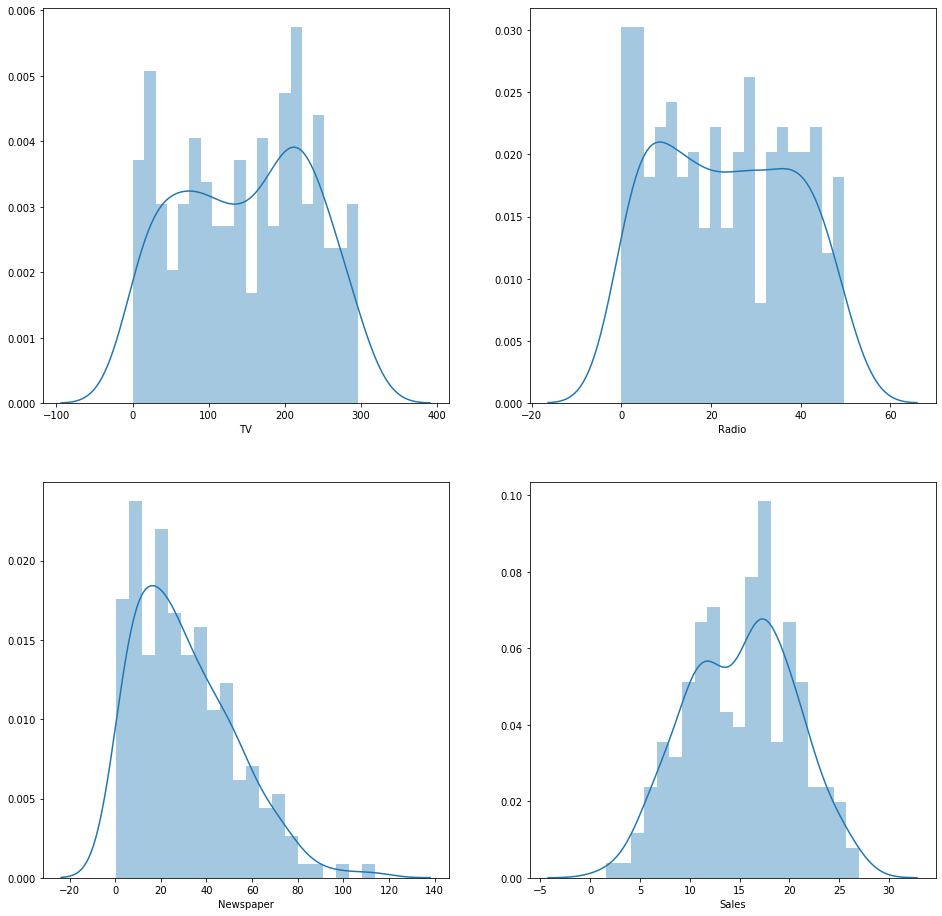

In [7]:
# Analyse data distribution
fig, ax = plt.subplots(2,2, figsize=(16,16))
sns.distplot(ad_data.TV, bins = 20, ax=ax[0,0])
sns.distplot(ad_data.Radio, bins = 20, ax=ax[0,1]) 
sns.distplot(ad_data.Newspaper, bins = 20, ax=ax[1,0]) 
sns.distplot(ad_data.Sales, bins = 20, ax=ax[1,1]) 

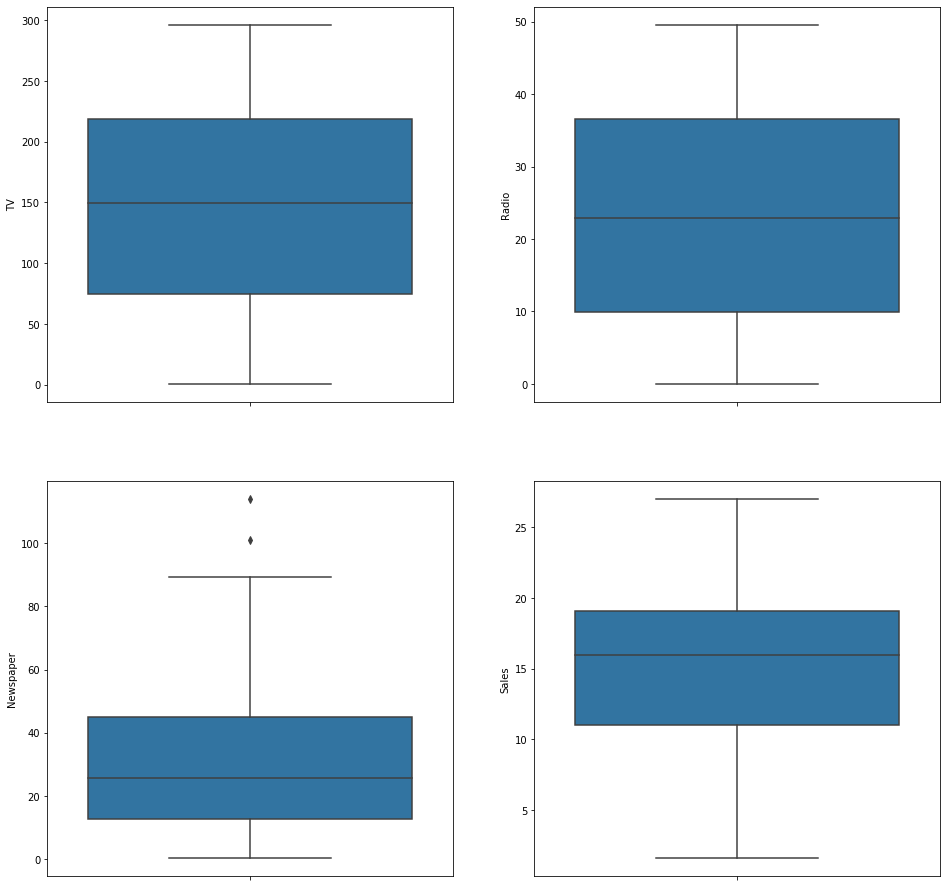

In [8]:
# Analyse Outliers via
fig, ax = plt.subplots(2,2, figsize=(16,16))
sns.boxplot(y=ad_data.TV, ax=ax[0,0])
sns.boxplot(y=ad_data.Radio, ax=ax[0,1])
sns.boxplot(y=ad_data.Newspaper, ax=ax[1,0])
sns.boxplot(y=ad_data.Sales, ax=ax[1,1])
plt.show()

In [9]:
# Analyse Newspaper spend data

# Getting percentiles of newspaper data distribution.
# 25%  = Q1, 50% = Q2 or median, 75% = Q3
paper_percentiles = np.percentile(ad_data.Newspaper, [25, 50, 75])
print(paper_percentiles)

q1, q3 = paper_percentiles[0], paper_percentiles[2]

# Any value out of 1.5 * IQR is usually treated as outlier. IQR is Q3 - Q1
# Other is any value out of bound of 5Percentile and 95% can be treated as outlier as well.
outlier_boundary = (q3 - q1) * 1.5

lower_bound = q1 - outlier_boundary
upper_bound = q3 + outlier_boundary

print("lower_bound = {}    upper_bound = {}".format(lower_bound, upper_bound))

outliers = ad_data.Newspaper[(ad_data.Newspaper < lower_bound) | (ad_data.Newspaper > upper_bound)]

[12.75 25.75 45.1 ]
lower_bound = -35.775000000000006    upper_bound = 93.625


In [10]:
ad_data[(ad_data.Newspaper < lower_bound) | (ad_data.Newspaper > upper_bound)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


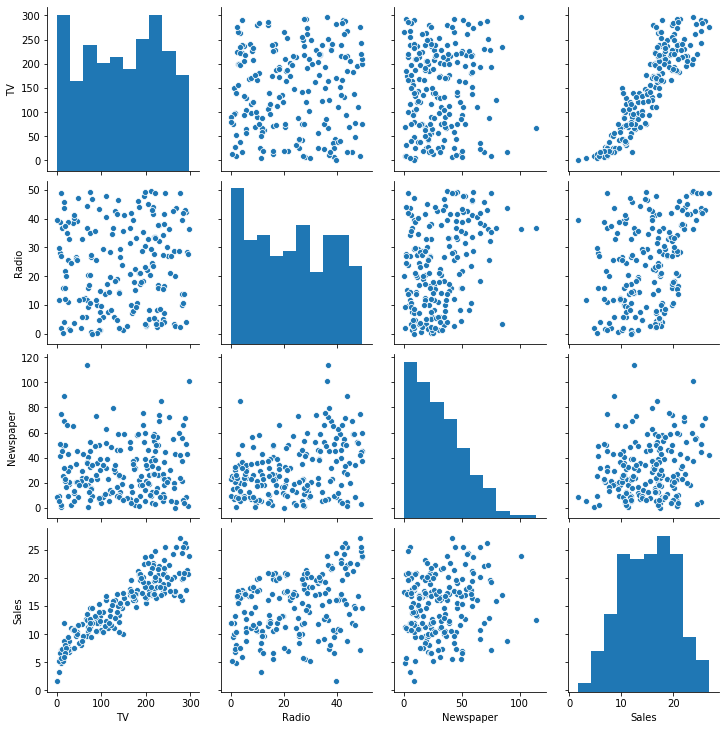

In [11]:
sns.pairplot(data=ad_data)

### Implementing Linear Regression (Multivariate Linear Regression)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
# split your dataset into features and target
X = ad_data[['TV', 'Radio', 'Newspaper']]
y = ad_data[["Sales"]]

In [14]:
# split your dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


In [15]:
# initialize model
lr_model = LinearRegression()

# fit model
lr_model.fit(X_train, y_train)

# make predictions
y_predicted = lr_model.predict(X_test)

In [16]:
print(lr_model.coef_, lr_model.intercept_)

[[ 0.05507865  0.10308563 -0.00090115]] [4.63762444]


In [18]:
metrics.r2_score(y_test, y_predicted)

0.8747226291661847

In [19]:
metrics.mean_squared_error(y_test, y_predicted)

2.4093336128923672

In [17]:
print(lr_model.score(X_train, y_train) * 100)
print(lr_model.score(X_test, y_test) * 100)

90.5486333977187
87.47226291661848


### To do to increase accuracy
1. Treat Missing value in radio
2. Treat Outlier in NewsPaper
3. Standardize the data
4. Can we just use TV data to predict our sales
5. We can try increasing our training dataset size

### using TV only (simple Linear Regression)

In [20]:
# Trying with just TV dataset
X_tv = X['TV']
X_tv_train, X_tv_test, y_tv_train, y_tv_test = train_test_split(X_tv, y, test_size = 0.20, random_state = True)

lr_model_tv = LinearRegression()
lr_model_tv.fit(np.array(X_tv_train).reshape(-1,1), y_tv_train)

# Default
print(lr_model_tv.score(np.array(X_tv_train).reshape(-1,1), y_tv_train) * 100)
print(lr_model_tv.score(np.array(X_tv_test).reshape(-1,1), y_tv_test) * 100)

82.36989366715561
72.41962282650849


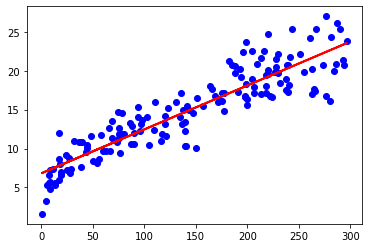

In [23]:
### plotting the line
y_train_predicted = lr_model_tv.predict(np.array(X_tv_train).reshape(-1,1))
plt.scatter(X_tv_train, y_tv_train,  color='blue')
plt.plot(X_tv_train, y_train_predicted, color='red', linewidth=2)
plt.show()

## Regression Assumptions

### There are few important assumptions that you have to follow for linear Regression:
##### 1. There should be Linear Relationship between Independent Variables(IV, Features) and Dependent Variable (Target Variable).
    
    *You can easily validate this by plotting a scatter plot between IV and Target variables.

##### 2. Independent Variables (IV, Features) should be independent of each other.
    * This is known as "Problem of Multicollinearity".
    * Linear Regression coefficients, simply, represent the change in Target Variable when a particular Independent Variable will be changed by 1 unit, keeping all other Independent Variables Constant.
    * If Independent Variables are not independent of each other, then change in one will cause change in others, thus creating ambiguity in the predicted value.
      
     *You can easily check for Multicollienearity using Correlation. For this, you can use Heatmaps or Pair Plots.
     
##### 3. Homoscedasticity (Constant Variance or Equal Scatter):
    * Error terms have the same (or almost same) variance for every observation of a Independent Variable, X. 
    * In other words, variance should be consistent. It should not change for all observations of X or a range of it.
    * If variance changes, it is known as Heteroscedasticity.
    
    *To check this we can use residual plot

##### 4. Normal Distribution of Error Terms :
    * Error terms should have a 0 mean ie. they should follow the normal bell curve( Gaussian Distribution, Normal Distribution).
    * Error terms represent the variation in the dependent variable which Independent variables can't explain. we assume that this variation is purely by chance and there is no defined pattern for this error. In other words, it is noise.
    * If the error terms is showing some pattern, it means we should model it in our regression model and our model is having some bias.
    *You can check this by plotting the histogram of residual terms or calculating the mean of residual terms.

##### 5. Little or no Auto-Correlation in the residuals, i.e. error terms are independent of each other
    * For all purposes, we assume that error is just by chance and there is no relation between occurence of one error an other.
    * If there is a pattern, then it means we are ignoring some factor and we should model this in our regression model itself.
    * Commonly occurs with Time-series data.

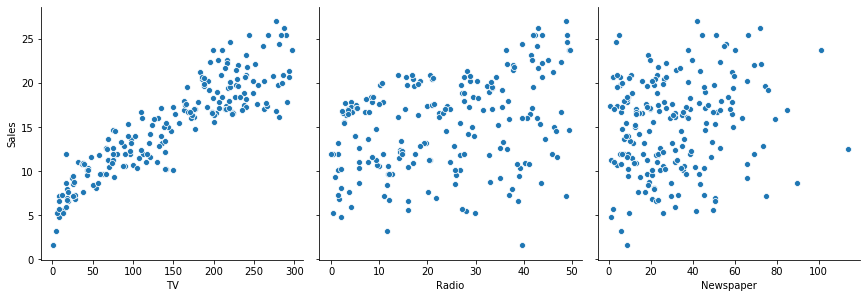

In [32]:
# visualize the relationship between the features and the target using scatterplots
sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height = 4)

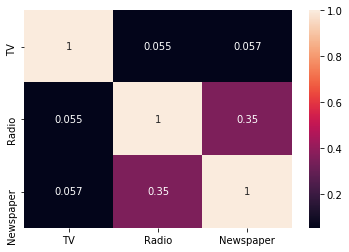

In [25]:
sns.heatmap(ad_data[['TV','Radio','Newspaper']].corr(), annot = True)

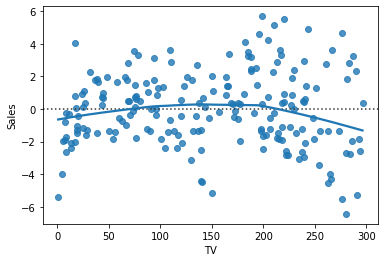

In [29]:
# Check Homoscedaticity:
sns.residplot(x = ad_data.TV, y = ad_data.Sales, lowess = True)

In [28]:
res = y_test - y_predicted
print(np.mean(res), np.var(res))
print(res.describe())

Sales    0.116614
dtype: float64 Sales    2.395735
dtype: float64
           Sales
count  40.000000
mean    0.116614
std     1.567534
min    -3.263979
25%    -0.888416
50%     0.209708
75%     1.155268
max     3.533360


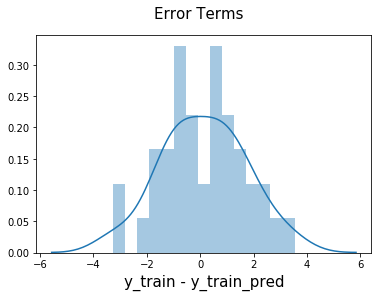

In [27]:
# visualize the error terms
#y_train_pred = lr.predict(X_train_sm)
res = (y_test - y_predicted)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()


In [ ]:
# checking residual using pandas autocorrelation plot.
print(y_predicted.shape, y_test.shape)

In [30]:
residuals = y_test - y_predicted

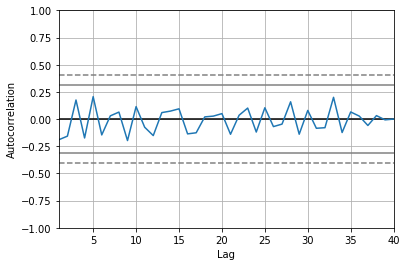

In [31]:
pd.plotting.autocorrelation_plot(residuals)